In [3]:
# CLASSIFICAITON PROBLEM: Predict the clothing item using fasion_mnist dataset
# Neural Netword used: FLATTEN -> FC -> FC

from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and Keras through TensorFlow
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc0


In [4]:
### Load the dataset
fashion_mnist = keras.datasets.fashion_mnist

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data() # X is (m, 28, 28) // Y is (m, 1)

# x is a 28x28 image, pixels value from 0 to 255.
# y is a integer from 0 to 9

In [5]:
# Mapping from y integer value to its corresponding string value
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print train/test set shapes
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape) # (1/6) the size of the training set
print('-' * 30)
print('Y_train shape: ', Y_train.shape)
print('Y_test shape: ', Y_test.shape)

X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)
------------------------------
Y_train shape:  (60000,)
Y_test shape:  (10000,)


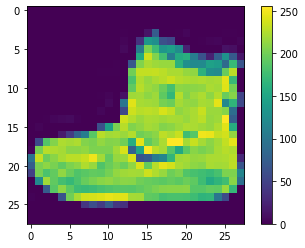

In [6]:
### Preprocess the data

# Plot a training example
plt.figure() # Create a new figure hooked into the pyplot interface
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False) # Remove the grid
plt.show()

# Normalize the pixels' values
# (All pixels' values range from 0 to 255, so why normalizing them between 0 and 1 ?)
X_train = X_train/255.0
X_test = X_test/225.0

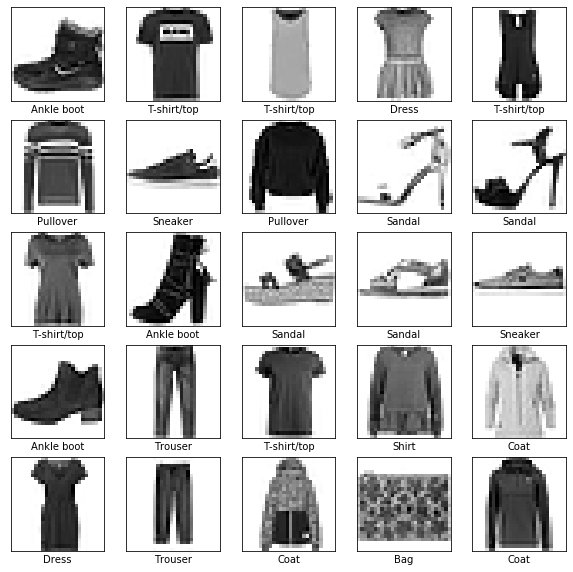

In [7]:
# Plot a sample of the training set

plt.figure(figsize=(10, 10)) # Size of each plot/image
for index in range(25):
    plt.subplot(5, 5, index + 1) # Add a subplot to the current figure (n_row, n_col, index on the grid)
    plt.xticks([]) # Disable the ticks
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[index], cmap=plt.cm.binary) # cmap : colormap used to map scalar data to colors
    plt.xlabel(class_names[Y_train[index]]) # Add legend to each figure
plt.show()

In [8]:
### Building the model: NN

# Stack the models layers: FLATTEN -> FC -> FC
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Unroll the training set (m, 28, 28) into (m, 28x28 = 784)
    keras.layers.Dense(128, activation='relu'), # 128 hidden units : (m, 784) into (m, 128)
    keras.layers.Dense(10, activation='softmax') # 10 hidden units : (m, 784) into (m, 10)
])

In [9]:
# Define the optimization algorithm to use, the loss function and the metrics
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy', # sparse because each output vector is a ont hot representation
             metrics=['accuracy'])

In [10]:
# Train the NN

model.fit(X_train, Y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5034 - accuracy: 0.8227

In [11]:
# Evaluate the model on the test set

loss_test, accuracy_test = model.evaluate(X_test, Y_test) # Compute loss/metrics based on the training set =! predict()
print('Test set loss function value: ', loss_test)
print('Test set accuracy: ', accuracy_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Output of the model on the 1 nd test example:  [7.0131727e-09 5.2911827e-14 7.2537447e-09 1.0078244e-12 1.2868695e-13
 5.0117262e-05 4.6501466e-07 5.5339533e-05 6.7374917e-10 9.9989402e-01]
------------------------------
Label prediction of the 1 nd test example:  Ankle boot
True output of the  1 nd test example:  Ankle boot


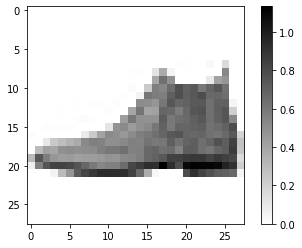

In [12]:
# Predict the result on the test set
predictions = model.predict(X_test) 

# Let's explore some predictions
index = 0
print('Output of the model on the', index + 1, 'nd test example: ', predictions[index])
print('-'*30)
print('Label prediction of the', index + 1 ,'nd test example: ', class_names[np.argmax(predictions[index])])
print('True output of the ', index + 1 ,'nd test example: ', class_names[Y_test[index]])

# Check the corresponding input image
plt.figure() # Create a new figure hooked into the pyplot interface
plt.imshow(X_test[index], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False) # Remove the grid
plt.show()

In [14]:
# Let's define a method to plot the predictions of the model

def plot_image(index, predictions, true_labels, X):
    ''' Define the plot corresponding to the index-th entry in the set X.
        Besides verify whether the prediction given is correct or not.
        
        index          index of the image to plot (int)
        predictions    output of the model (m, #classes)
        true_labels    true labels of the set X (m, 1)
        X              input set passed to the model (m, 28, 28)
    '''
    
    # Get the index-th entry image, prediction and true label
    prediction, true_label, x = predictions[index], true_labels[index], X[index]
    
    # Plot the image: x
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x, cmap=plt.cm.binary)
    
    # Get the predicted label (argmax(softmax))
    predicted_label = np.argmax(prediction)
    
    # Write the label of the image in blue/red if the predicted label is correct/incorrect
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(' {} {:2.0f}% ({})'.format(class_names[predicted_label],  # class of the prediction
                                          100*np.max(prediction), # confidence in %
                                          class_names[true_label]), # class of the true label
                                          color=color) # color of the text
    
    

In [15]:
# Let's define a method to plot the model's confidence for each possible class

def plot_model_confidence(index, predictions, true_labels):
    ''' Define the plot corresponding to the model's confidence
        for each possible classes of the index-th entry.
        
        index          index of the image to plot (int)
        predictions    output of the model (m, #classes)
        true_labels    true labels of the set X (m, 1)
    '''
    
    # Get the index-th entry prediction and true label
    prediction, true_label = predictions[index], true_labels[index]
    
    # Plot the histogram
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation=45)
    current_plot = plt.bar(range(10), prediction, color='grey') # Histogram, returns a container with all the bars
    plt.ylim([0, 1]) # Set the limit of the y-axis
    
    # Get the predicted label
    predicted_label = np.argmax(prediction)
    
    # Tune the bars' color in the histogram according to the predicted label and true label
    current_plot[predicted_label].set_color('red')
    current_plot[true_label].set_color('blue') # Overwrite the color bar in blue if the prediction is correct

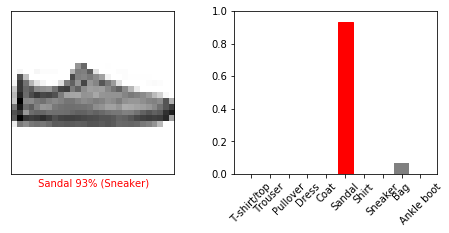

In [18]:
# Let's test the plot_image and plot_model_confidence methods

index = 12
# Define the figure size
plt.figure(figsize=(8, 3))
# Plot 2 figures one next to each other
plt.subplot(1, 2, 1) # n_row, n_col, index on the grid
plot_image(index, predictions, Y_test, X_test)
plt.subplot(1, 2, 2)
plot_model_confidence(index, predictions, Y_test)
plt.show()

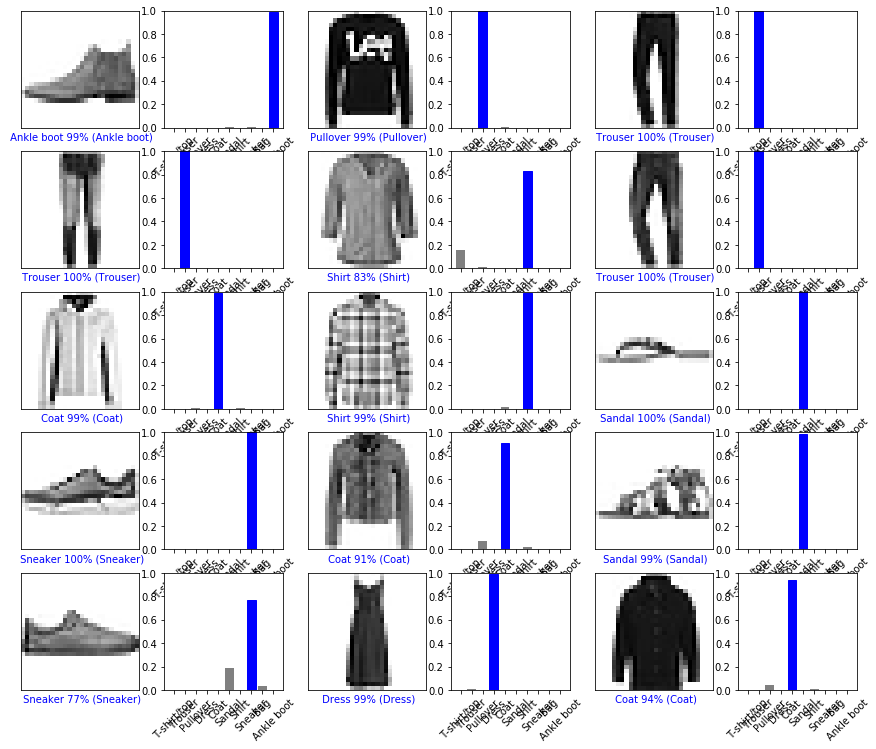

In [32]:
# Let's test the plot_image and plot_model_confidence methods with many test examples

# Color: blue for correct predictions, red for incorrect predictions

# Define the size of the grid
n_rows = 5
n_cols = 3
n_images = n_rows*n_cols

# Define the figure size
plt.figure(figsize=(2.5*2*n_cols, 2.5*n_rows)) # 2.5 times to make the subplots bigger, the second times 2 to plot 2 images per subplot
for index in range(n_images):
    # Define the position of the next subplot
    plt.subplot(n_rows, 2*n_cols, 2*index + 1) # 1-index for the position
    plot_image(index, predictions, Y_test, X_test)
    plt.subplot(n_rows, 2*n_cols, 2*index + 2)
    plot_model_confidence(index, predictions, Y_test)
plt.show()

Size of single example: (28, 28)
------------------------------
Prediction of the single example:  [8.9633077e-06 1.6859160e-07 2.3207538e-05 9.5254399e-07 1.7315462e-05
 3.0331244e-03 9.3466597e-06 5.7517244e-03 7.5462034e-05 9.9107975e-01]
Predicted label on the single example:  9  ->  Ankle boot


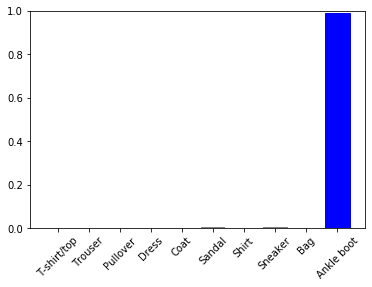

In [41]:
# Let's compute the prediction on a SINGLE test example

index = 0
x_test_sample = X_test[index]
print('Size of single example:', x_test_sample.shape)
print('-'*30)

# To pass the image to Keras.predict method, the dimension of the input
# should be (m, width, height)
x_test_sample = np.expand_dims(x_test_sample, 0) # Now x_test_sample is (1, width, height)
x_prediction = model.predict(x_test_sample)

# Print the prediction(proba distribution over the 10 classes)
print('Prediction of the single example: ', x_prediction[index])
print('Predicted label on the single example: ', np.argmax(x_prediction[index]),
      ' -> ', class_names[np.argmax(x_prediction[index])])

# Plot the model's confidence graph
plot_model_confidence(index, x_prediction, Y_test)
plt.show()